# Demo notebook for the Tropical Cyclones diagnostic

Before proceeding you should edit output file paths in `config_tcs_notebook.yml`

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import os
from tropical_cyclones import TCs, multi_plot
from aqua.util import load_yaml
from aqua.logger import log_configure
mainlogger = log_configure('INFO', log_name='MAIN')

To run notebook with slurm

In [2]:
from aqua.slurm import slurm
slurm.job(cores=8, memory="50 GB", jobs=1, queue = "interactive", walltime='6:00:00')

2023-07-03 22:02:16 :: create_folder :: WARNING  -> Folder ./slurm already exists
2023-07-03 22:02:16 :: create_folder :: WARNING  -> Folder ./slurm/logs already exists
2023-07-03 22:02:16 :: create_folder :: WARNING  -> Folder ./slurm/output already exists
2023-07-03 22:02:20 :: slurm :: WARNING  -> #!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -p interactive
#SBATCH -A bb1153
#SBATCH -n 1
#SBATCH --cpus-per-task=8
#SBATCH --mem=47G
#SBATCH -t 6:00:00
#SBATCH --error=./slurm/logs/dask-worker-%j.err
#SBATCH --output=./slurm/output/dask-worker-%j.out

/work/bb1153/b382216/mambaforge/envs/TCs/bin/python -m distributed.cli.dask_worker tcp://136.172.124.6:38227 --nthreads 2 --nworkers 4 --memory-limit 11.64GiB --name dummy-name --nanny --death-timeout 60



Info on slurm job

In [3]:
slurm.squeue()

JOBID      CPUS  NODES ST         NAME                 TIME       START_TIME           DEPENDENCY           PARTITION            MIN_MEMORY          
5847323    24    1     R          dask-worker          0:10       2023-07-03T22:02:21  (null)               interactive          47G                 


0

Get variables and other parameters from configuration file and store them in a dictionary. To change experiment and change tempest-extremes 
parameters and streaming options please see the config_tcs_notebook.yaml file in the same notebook dir and adjust it accordingly.

In [6]:
# load the config file
config = load_yaml('config_tcs_notebook.yaml')
config

{'dataset': {'model': 'IFS', 'exp': 'tco1279-orca025-cycle3', 'source2d': '2D_1h_native', 'source3d': '3D_1h_native'}, 'paths': {'tmpdir': '/home/b/b382216/scratch/test/fulldir', 'fulldir': '/home/b/b382216/scratch/test/fulldir', 'plotdir': '/home/b/b382216/work/tc/Figures/'}, 'setup': {'loglevel': 'INFO'}, 'grids': {'lowgrid': 'r100', 'highgrid': 'r100'}, 'varlist': ['msl'], 'time': {'startdate': '2020-01-20', 'enddate': '2025-01-01', 'frequency': '6h'}, 'stream': {'streamstep': '10D'}, 'detect': {'boxdim': 10}, 'stitch': {'n_days_freq': 30, 'n_days_ext': 2}}

Initialises the TCs class and calls the loop_streaming method which is a wrapper to retrieve data, prepare them, run DetectNodes and StitchNodes
and finally save the selected variables (defined in the config.yml file) with original model resolution along TCs tracks in a netcdf file.

In [8]:
# initialise tropical class with streaming options
tropical = TCs(tdict=config, streaming=True,
                stream_step=config['stream']['streamstep'],
                stream_startdate=config['time']['startdate'],
                paths=config['paths'],
                loglevel=config['setup']['loglevel'],
                nproc=1)
tropical.loop_streaming(config)

2023-11-22 16:45:33 :: TCs :: WARNING  -> Model IFS - Exp: tco1279-orca025-cycle3
2023-11-22 16:45:33 :: TCs :: WARNING  -> Initialised streaming for 10D days starting on 2020-01-20
2023-11-22 16:45:34 :: Reader :: INFO     -> Fixes found for model IFS, experiment tco1279-orca025-cycle3, source 2D_1h_native
2023-11-22 16:45:34 :: Reader :: INFO     -> For source 2D_1h_native, method for fixes is: default
2023-11-22 16:45:34 :: yaml :: INFO     -> Updating the log_level to INFO
2023-11-22 16:45:39 :: Reader :: INFO     -> Space_coords deduced from the source are ['value']
2023-11-22 16:45:39 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json
2023-11-22 16:45:39 :: Reader :: INFO     -> Data model: ../../../config/data_models/ifs2cds.json
2023-11-22 16:45:39 :: Reader :: INFO     -> No specific fixes available for model IFS, experiment tco1279-orca025-cycle3, source 3D_1h_native: checking for model default...
2023-11-22 16:45:39 :: Reader :: INFO     -> Using d

[########################################] | 100% Completed | 1.24 sms


2023-11-22 16:45:59 :: TCs :: INFO     -> DetectNodes done in 14.8016 seconds
2023-11-22 16:45:59 :: TCs :: WARNING  -> processing time step 20200120T06
2023-11-22 16:45:59 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200120T06
2023-11-22 16:45:59 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:46:05 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200120T06
2023-11-22 16:46:05 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200120T06
2023-11-22 16:46:05 :: TCs :: INFO     -> store_fullres_field for timestep 20200120T06


[########################################] | 100% Completed | 1.02 sms


2023-11-22 16:46:06 :: TCs :: INFO     -> DetectNodes done in 7.6354 seconds
2023-11-22 16:46:06 :: TCs :: WARNING  -> processing time step 20200120T12
2023-11-22 16:46:06 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200120T12
2023-11-22 16:46:06 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:46:13 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200120T12
2023-11-22 16:46:14 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200120T12
2023-11-22 16:46:14 :: TCs :: INFO     -> store_fullres_field for timestep 20200120T12


[########################################] | 100% Completed | 1.32 sms


2023-11-22 16:46:15 :: TCs :: INFO     -> DetectNodes done in 9.0898 seconds
2023-11-22 16:46:15 :: TCs :: WARNING  -> processing time step 20200120T18
2023-11-22 16:46:15 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200120T18
2023-11-22 16:46:16 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:46:22 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200120T18
2023-11-22 16:46:23 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200120T18
2023-11-22 16:46:23 :: TCs :: INFO     -> store_fullres_field for timestep 20200120T18


[########################################] | 100% Completed | 1.22 sms


2023-11-22 16:46:24 :: TCs :: INFO     -> DetectNodes done in 8.6133 seconds
2023-11-22 16:46:24 :: TCs :: WARNING  -> processing time step 20200121T00
2023-11-22 16:46:24 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200121T00
2023-11-22 16:46:24 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:46:31 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200121T00
2023-11-22 16:46:31 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200121T00
2023-11-22 16:46:31 :: TCs :: INFO     -> store_fullres_field for timestep 20200121T00


[########################################] | 100% Completed | 1.11 sms


2023-11-22 16:46:32 :: TCs :: INFO     -> DetectNodes done in 8.0991 seconds
2023-11-22 16:46:32 :: TCs :: WARNING  -> processing time step 20200121T06
2023-11-22 16:46:32 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200121T06
2023-11-22 16:46:32 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:46:37 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200121T06
2023-11-22 16:46:37 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200121T06
2023-11-22 16:46:37 :: TCs :: INFO     -> store_fullres_field for timestep 20200121T06


[########################################] | 100% Completed | 1.13 sms


2023-11-22 16:46:38 :: TCs :: INFO     -> DetectNodes done in 6.4058 seconds
2023-11-22 16:46:38 :: TCs :: WARNING  -> processing time step 20200121T12
2023-11-22 16:46:38 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200121T12
2023-11-22 16:46:39 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:46:43 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200121T12
2023-11-22 16:46:44 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200121T12
2023-11-22 16:46:44 :: TCs :: INFO     -> store_fullres_field for timestep 20200121T12


[########################################] | 100% Completed | 1.01 sms


2023-11-22 16:46:45 :: TCs :: INFO     -> DetectNodes done in 6.2886 seconds
2023-11-22 16:46:45 :: TCs :: WARNING  -> processing time step 20200121T18
2023-11-22 16:46:45 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200121T18
2023-11-22 16:46:45 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:46:50 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200121T18
2023-11-22 16:46:50 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200121T18
2023-11-22 16:46:50 :: TCs :: INFO     -> store_fullres_field for timestep 20200121T18


[########################################] | 100% Completed | 1.01 sms


2023-11-22 16:46:51 :: TCs :: INFO     -> DetectNodes done in 6.0769 seconds
2023-11-22 16:46:51 :: TCs :: WARNING  -> processing time step 20200122T00
2023-11-22 16:46:51 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200122T00
2023-11-22 16:46:51 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:46:56 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200122T00
2023-11-22 16:46:56 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200122T00
2023-11-22 16:46:56 :: TCs :: INFO     -> store_fullres_field for timestep 20200122T00


[########################################] | 100% Completed | 1.02 sms


2023-11-22 16:46:57 :: TCs :: INFO     -> DetectNodes done in 6.1137 seconds
2023-11-22 16:46:57 :: TCs :: WARNING  -> processing time step 20200122T06
2023-11-22 16:46:57 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200122T06
2023-11-22 16:46:57 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:47:02 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200122T06
2023-11-22 16:47:02 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200122T06
2023-11-22 16:47:02 :: TCs :: INFO     -> store_fullres_field for timestep 20200122T06


[########################################] | 100% Completed | 1.02 sms


2023-11-22 16:47:03 :: TCs :: INFO     -> DetectNodes done in 6.5113 seconds
2023-11-22 16:47:03 :: TCs :: WARNING  -> processing time step 20200122T12
2023-11-22 16:47:03 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200122T12
2023-11-22 16:47:04 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:47:08 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200122T12
2023-11-22 16:47:09 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200122T12
2023-11-22 16:47:09 :: TCs :: INFO     -> store_fullres_field for timestep 20200122T12


[########################################] | 100% Completed | 1.32 sms


2023-11-22 16:47:10 :: TCs :: INFO     -> DetectNodes done in 6.8678 seconds
2023-11-22 16:47:10 :: TCs :: WARNING  -> processing time step 20200122T18
2023-11-22 16:47:10 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200122T18
2023-11-22 16:47:10 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:47:15 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200122T18
2023-11-22 16:47:15 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200122T18
2023-11-22 16:47:16 :: TCs :: INFO     -> store_fullres_field for timestep 20200122T18


[########################################] | 100% Completed | 1.12 sms


2023-11-22 16:47:17 :: TCs :: INFO     -> DetectNodes done in 6.5269 seconds
2023-11-22 16:47:17 :: TCs :: WARNING  -> processing time step 20200123T00
2023-11-22 16:47:17 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200123T00
2023-11-22 16:47:17 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:47:22 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200123T00
2023-11-22 16:47:22 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200123T00
2023-11-22 16:47:22 :: TCs :: INFO     -> store_fullres_field for timestep 20200123T00


[########################################] | 100% Completed | 1.32 sms


2023-11-22 16:47:23 :: TCs :: INFO     -> DetectNodes done in 6.5429 seconds
2023-11-22 16:47:23 :: TCs :: WARNING  -> processing time step 20200123T06
2023-11-22 16:47:23 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200123T06
2023-11-22 16:47:24 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:47:29 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200123T06
2023-11-22 16:47:29 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200123T06
2023-11-22 16:47:29 :: TCs :: INFO     -> store_fullres_field for timestep 20200123T06


[########################################] | 100% Completed | 1.12 sms


2023-11-22 16:47:30 :: TCs :: INFO     -> DetectNodes done in 7.0609 seconds
2023-11-22 16:47:30 :: TCs :: WARNING  -> processing time step 20200123T12
2023-11-22 16:47:30 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200123T12
2023-11-22 16:47:31 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:47:36 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200123T12
2023-11-22 16:47:36 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200123T12
2023-11-22 16:47:36 :: TCs :: INFO     -> store_fullres_field for timestep 20200123T12


[########################################] | 100% Completed | 1.01 sms


2023-11-22 16:47:37 :: TCs :: INFO     -> DetectNodes done in 6.4744 seconds
2023-11-22 16:47:37 :: TCs :: WARNING  -> processing time step 20200123T18
2023-11-22 16:47:37 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200123T18
2023-11-22 16:47:37 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:47:42 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200123T18
2023-11-22 16:47:42 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200123T18
2023-11-22 16:47:42 :: TCs :: INFO     -> store_fullres_field for timestep 20200123T18


[########################################] | 100% Completed | 1.01 sms


2023-11-22 16:47:43 :: TCs :: INFO     -> DetectNodes done in 6.2091 seconds
2023-11-22 16:47:43 :: TCs :: WARNING  -> processing time step 20200124T00
2023-11-22 16:47:43 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200124T00
2023-11-22 16:47:43 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:47:48 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200124T00
2023-11-22 16:47:48 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200124T00
2023-11-22 16:47:48 :: TCs :: INFO     -> store_fullres_field for timestep 20200124T00


[########################################] | 100% Completed | 1.13 sms


2023-11-22 16:47:49 :: TCs :: INFO     -> DetectNodes done in 6.2453 seconds
2023-11-22 16:47:49 :: TCs :: WARNING  -> processing time step 20200124T06
2023-11-22 16:47:49 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200124T06
2023-11-22 16:47:50 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:47:54 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200124T06
2023-11-22 16:47:54 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200124T06
2023-11-22 16:47:54 :: TCs :: INFO     -> store_fullres_field for timestep 20200124T06


[########################################] | 100% Completed | 1.01 sms


2023-11-22 16:47:56 :: TCs :: INFO     -> DetectNodes done in 6.1611 seconds
2023-11-22 16:47:56 :: TCs :: WARNING  -> processing time step 20200124T12
2023-11-22 16:47:56 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200124T12
2023-11-22 16:47:56 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:01 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200124T12
2023-11-22 16:48:01 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200124T12
2023-11-22 16:48:01 :: TCs :: INFO     -> store_fullres_field for timestep 20200124T12


[########################################] | 100% Completed | 1.12 sms


2023-11-22 16:48:02 :: TCs :: INFO     -> DetectNodes done in 6.6181 seconds
2023-11-22 16:48:02 :: TCs :: WARNING  -> processing time step 20200124T18
2023-11-22 16:48:02 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200124T18
2023-11-22 16:48:02 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:07 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200124T18
2023-11-22 16:48:07 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200124T18
2023-11-22 16:48:08 :: TCs :: INFO     -> store_fullres_field for timestep 20200124T18


[########################################] | 100% Completed | 1.21 sms


2023-11-22 16:48:09 :: TCs :: INFO     -> DetectNodes done in 6.7365 seconds
2023-11-22 16:48:09 :: TCs :: WARNING  -> processing time step 20200125T00
2023-11-22 16:48:09 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200125T00
2023-11-22 16:48:09 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:14 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200125T00
2023-11-22 16:48:14 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200125T00
2023-11-22 16:48:15 :: TCs :: INFO     -> store_fullres_field for timestep 20200125T00


[########################################] | 100% Completed | 1.02 sms


2023-11-22 16:48:16 :: TCs :: INFO     -> DetectNodes done in 6.8634 seconds
2023-11-22 16:48:16 :: TCs :: WARNING  -> processing time step 20200125T06
2023-11-22 16:48:16 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200125T06
2023-11-22 16:48:16 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:20 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200125T06
2023-11-22 16:48:20 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200125T06
2023-11-22 16:48:20 :: TCs :: INFO     -> store_fullres_field for timestep 20200125T06


[########################################] | 100% Completed | 1.01 sms


2023-11-22 16:48:21 :: TCs :: INFO     -> DetectNodes done in 5.7336 seconds
2023-11-22 16:48:21 :: TCs :: WARNING  -> processing time step 20200125T12
2023-11-22 16:48:21 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200125T12
2023-11-22 16:48:22 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:27 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200125T12
2023-11-22 16:48:27 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200125T12
2023-11-22 16:48:27 :: TCs :: INFO     -> store_fullres_field for timestep 20200125T12


[########################################] | 100% Completed | 1.22 sms


2023-11-22 16:48:29 :: TCs :: INFO     -> DetectNodes done in 7.2917 seconds
2023-11-22 16:48:29 :: TCs :: WARNING  -> processing time step 20200125T18
2023-11-22 16:48:29 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200125T18
2023-11-22 16:48:29 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:34 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200125T18
2023-11-22 16:48:34 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200125T18
2023-11-22 16:48:34 :: TCs :: INFO     -> store_fullres_field for timestep 20200125T18


[########################################] | 100% Completed | 1.01 sms


2023-11-22 16:48:35 :: TCs :: INFO     -> DetectNodes done in 6.4601 seconds
2023-11-22 16:48:35 :: TCs :: WARNING  -> processing time step 20200126T00
2023-11-22 16:48:35 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200126T00
2023-11-22 16:48:35 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:40 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200126T00
2023-11-22 16:48:40 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200126T00
2023-11-22 16:48:40 :: TCs :: INFO     -> store_fullres_field for timestep 20200126T00


[########################################] | 100% Completed | 1.23 sms


2023-11-22 16:48:41 :: TCs :: INFO     -> DetectNodes done in 6.1511 seconds
2023-11-22 16:48:41 :: TCs :: WARNING  -> processing time step 20200126T06
2023-11-22 16:48:41 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200126T06
2023-11-22 16:48:42 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:46 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200126T06
2023-11-22 16:48:47 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200126T06
2023-11-22 16:48:47 :: TCs :: INFO     -> store_fullres_field for timestep 20200126T06


[########################################] | 100% Completed | 1.21 sms


2023-11-22 16:48:48 :: TCs :: INFO     -> DetectNodes done in 6.5504 seconds
2023-11-22 16:48:48 :: TCs :: WARNING  -> processing time step 20200126T12
2023-11-22 16:48:48 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200126T12
2023-11-22 16:48:48 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:53 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200126T12
2023-11-22 16:48:53 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200126T12
2023-11-22 16:48:53 :: TCs :: INFO     -> store_fullres_field for timestep 20200126T12


[########################################] | 100% Completed | 1.02 sms


2023-11-22 16:48:54 :: TCs :: INFO     -> DetectNodes done in 6.3838 seconds
2023-11-22 16:48:54 :: TCs :: WARNING  -> processing time step 20200126T18
2023-11-22 16:48:54 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200126T18
2023-11-22 16:48:54 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:48:59 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200126T18
2023-11-22 16:48:59 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200126T18
2023-11-22 16:48:59 :: TCs :: INFO     -> store_fullres_field for timestep 20200126T18


[########################################] | 100% Completed | 909.33 ms


2023-11-22 16:49:00 :: TCs :: INFO     -> DetectNodes done in 5.6749 seconds
2023-11-22 16:49:00 :: TCs :: WARNING  -> processing time step 20200127T00
2023-11-22 16:49:00 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200127T00
2023-11-22 16:49:00 :: TCs :: INFO     -> Writing low res to disk..
2023-11-22 16:49:04 :: TCs :: INFO     -> Running run_detect_nodes() for timestep 20200127T00
2023-11-22 16:49:04 :: TCs :: INFO     -> Running store_detect_nodes() for timestep 20200127T00
2023-11-22 16:49:04 :: TCs :: INFO     -> store_fullres_field for timestep 20200127T00


[########################################] | 100% Completed | 1.29 sms


2023-11-22 16:49:06 :: TCs :: INFO     -> DetectNodes done in 5.7681 seconds
2023-11-22 16:49:06 :: TCs :: WARNING  -> processing time step 20200127T06
2023-11-22 16:49:06 :: TCs :: INFO     -> Running readwrite_from_intake() for 20200127T06
2023-11-22 16:49:06 :: TCs :: INFO     -> Writing low res to disk..


Plot some variables following a track for a few time steps
First select a track file to open. Tracks files are contained in the $fulldir (see config file)
Select a start-end date for a period during which you want to plot variables

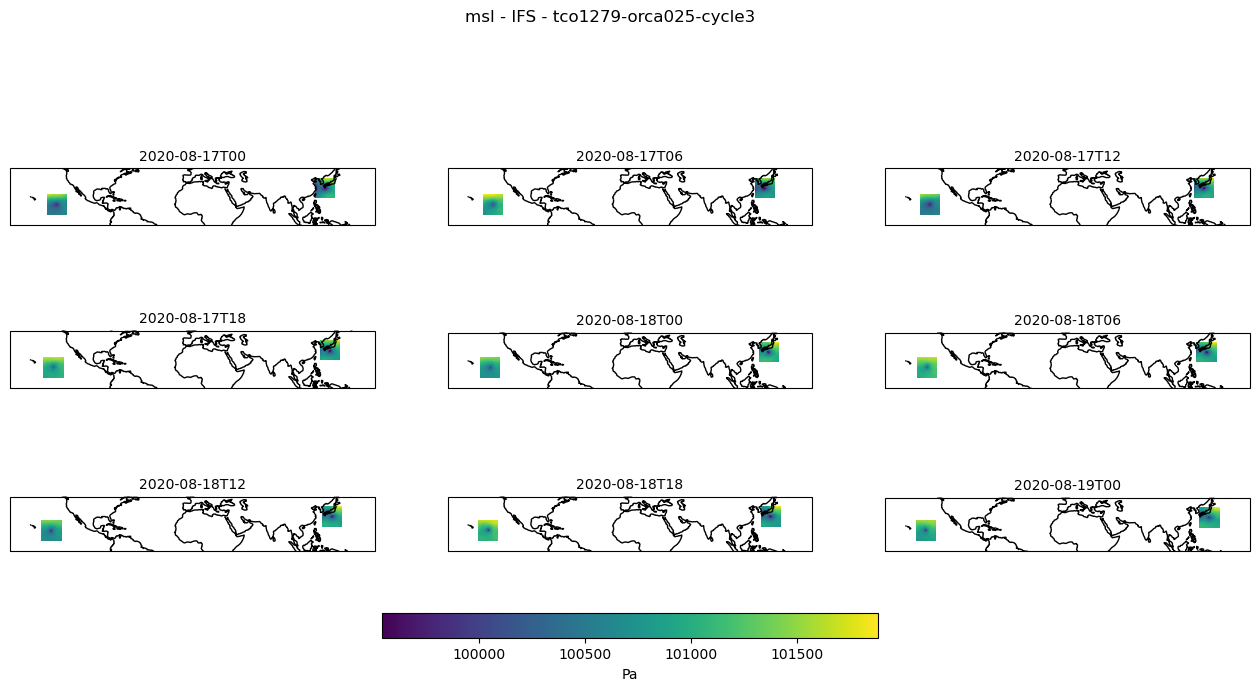

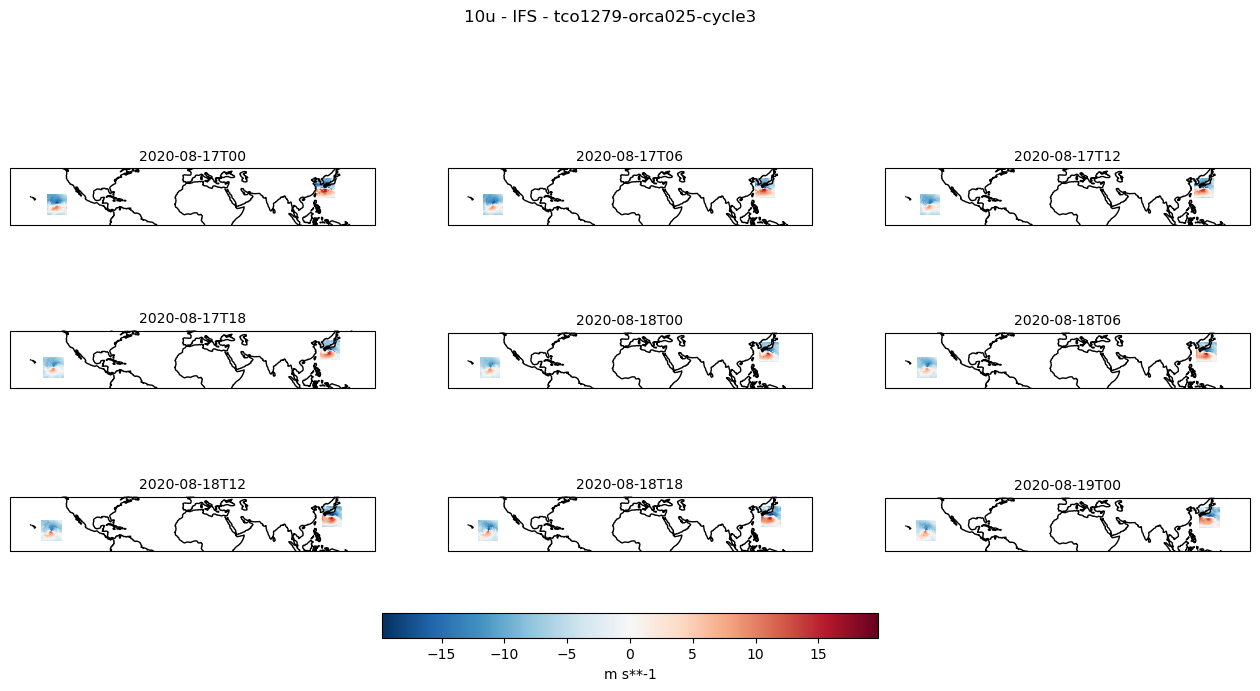

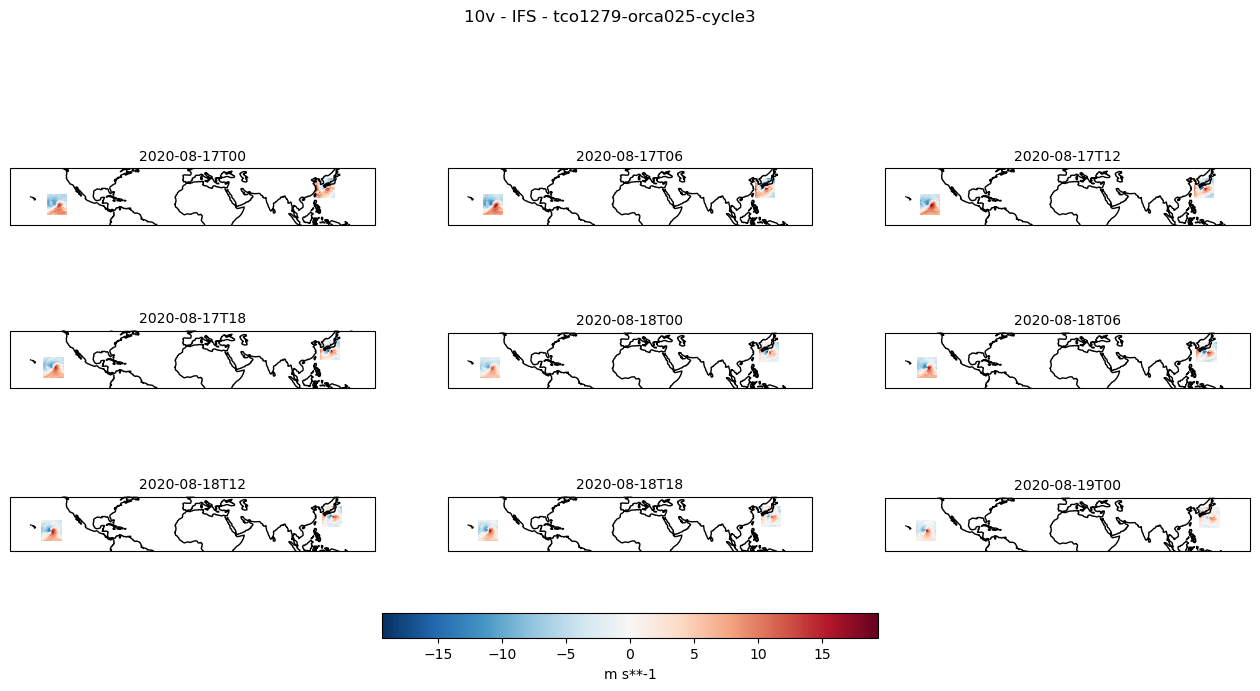

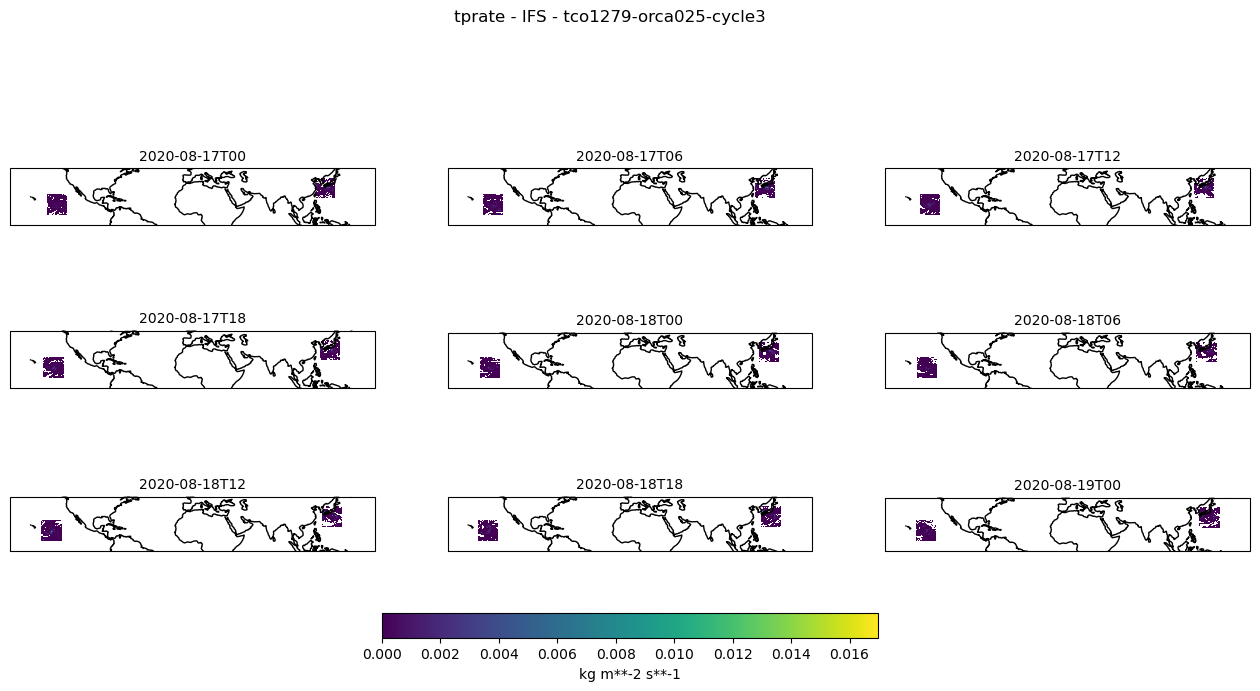

In [6]:
# at first select a track file to open. Tracks files are contained in the fulldir (see config file)

# select a start-end date for a period during which you want to plot variables

startend="20200817-20200915"
tracks_nc_file = os.path.join(tdict['paths']['fulldir'], f"{tdict['dataset']['model']}-{tdict['dataset']['exp']}/tempest_tracks_{startend}.nc")

# Example plot for variables contained in varlist:
for var in tdict['varlist']: 
    tracks_nc_file_var = xr.open_dataset(tracks_nc_file)[var]
    multi_plot(tracks_nc_file_var, tdict, save=False)

First select a track file to open. Tracks files are contained in the $fulldir (see config file)
select a start-end date for a period during which you want to plot variables

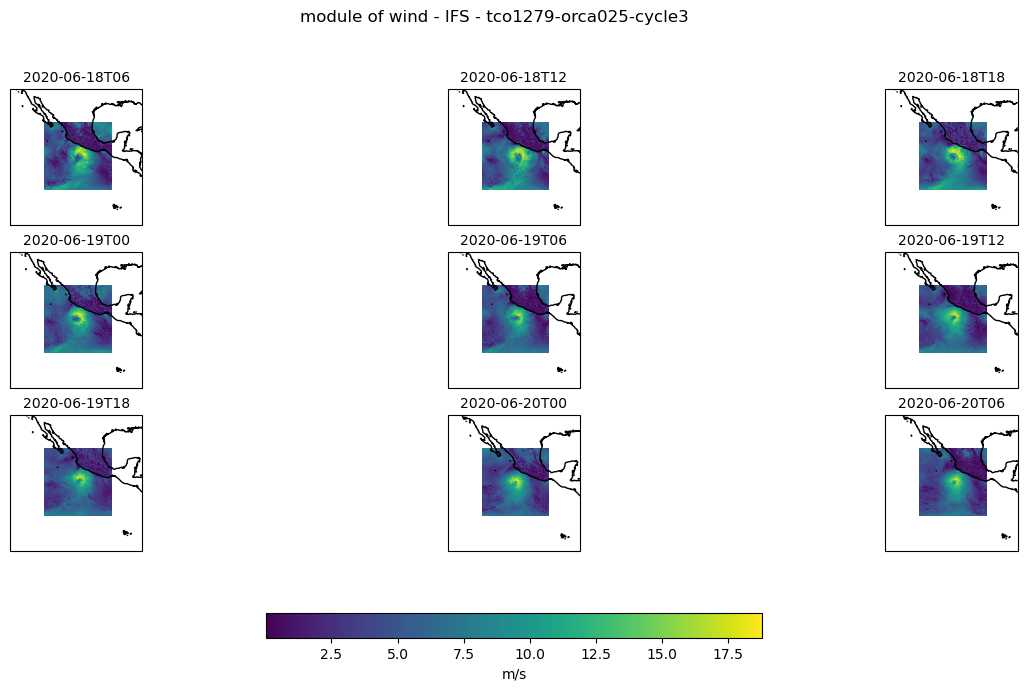

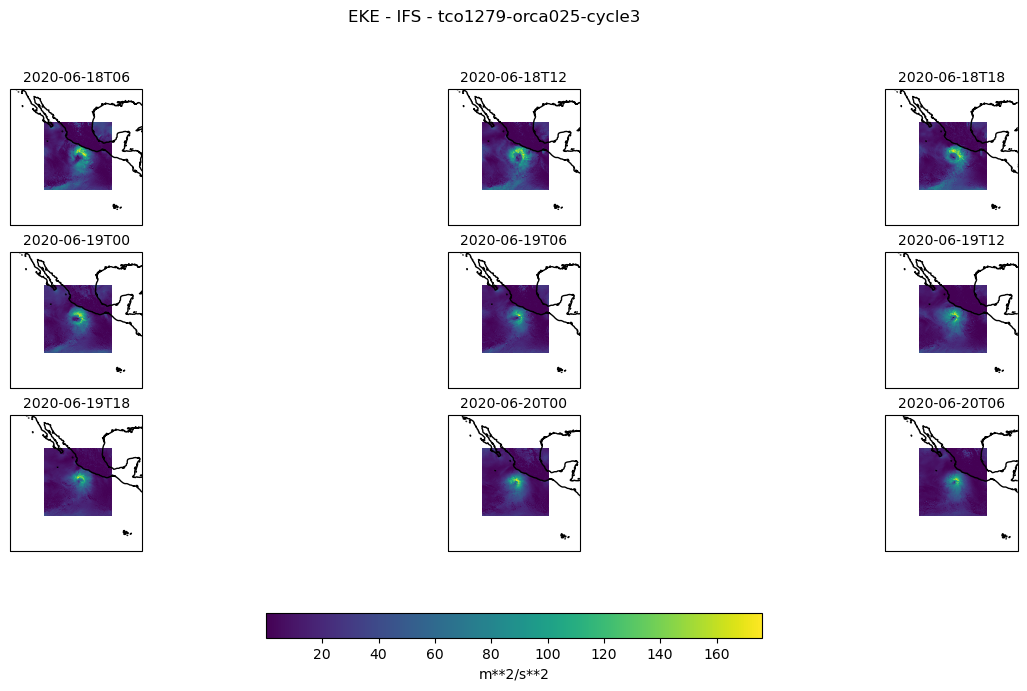

In [8]:


startend="20200618-20200717"
tracks_nc_file = os.path.join(tdict['paths']['fulldir'], f"{tdict['dataset']['model']}-{tdict['dataset']['exp']}/tempest_tracks_{startend}.nc")

# Example plot for module of wind and Eddy Kinetik Energy (EKE) (if 10u and 10v are available):

tracks_nc_file_u = xr.open_dataset(tracks_nc_file)["10u"]
tracks_nc_file_v = xr.open_dataset(tracks_nc_file)["10v"]

# module of wind
tracks_nc_file_uvmod = (tracks_nc_file_u**2 + tracks_nc_file_v**2)**0.5
multi_plot(tracks_nc_file_uvmod, tdict, title="module of wind", units="m/s")

# EKE
tracks_nc_file_EKE = 0.5*(tracks_nc_file_u**2 + tracks_nc_file_v**2)
multi_plot(tracks_nc_file_EKE, tdict, title="EKE", units="m**2/s**2")

Finally plot all TCs tracks found in the simulation

Getting trajectories from TempestExtremes file...
Running getTrajectories on '/home/b/b382216/scratch/tmpdir/IFS/tco1279-orca025-cycle3/tempest_tracks_tot.txt' with unstruc set to '0'
nVars set to 10 and headerDelimStr set to 'start'
Found 10 columns
Found 295 trajectories
... done reading data


/work/bb1153/b382216/mambaforge/envs/TCs/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/work/bb1153/b382216/mambaforge/envs/TCs/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


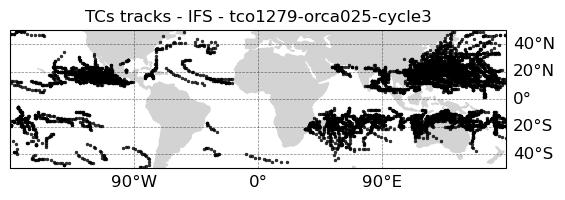

In [4]:
from glob import glob

filenames = sorted(glob(os.path.join(tdict['paths']['tmpdir'], tdict['dataset']['model'], tdict['dataset']['exp'], "tempest_track*.txt")))

with open(os.path.join(tdict['paths']['tmpdir'], tdict['dataset']['model'], tdict['dataset']['exp'], f"tempest_tracks_tot.txt"), 'w') as output_file:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                output_file.write(line)
tracks_file = os.path.join(tdict['paths']['tmpdir'], tdict['dataset']['model'], tdict['dataset']['exp'], "tempest_tracks_tot.txt")
plot_trajectories(tracks_file, tdict)